# Super store Sales Analysis

In [104]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio ## graph ke templates ke liye
import plotly.colors as colors
pio.templates.default= 'plotly_white'
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

In [167]:
df= pd.read_csv('Sample - Superstore.csv',encoding = 'latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [69]:
df.shape

(9994, 21)

In [70]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [71]:
## Check columns`dataype of numerical features
df.select_dtypes(include='number').columns

Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [72]:
## Check columns`dataype of numerical features
df.select_dtypes(include='object').columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [66]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Apply EXploatary Data Analysis (EDA)

### 1.) Data Cleaning & Pre-processing

In [74]:
## Check Null values
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [75]:
## Check Duplicate Values
df.duplicated().sum()

0

In [168]:
## Remove unnecessary columns
df.drop(['Row ID','Country','Postal Code','Product ID','Product Name','Customer Name','Discount'],axis=1,inplace=True)
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.96,2,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.94,3,219.5820


In [169]:
df.shape

(9994, 14)

In [170]:
## Extract Date & Month & year from Order date features
df['Order Date']= pd.to_datetime(df['Order Date'])  ## change object datatype to date datatype
df['Order_Date_month']= df['Order Date'].dt.month
df['Order_Date_year']= df['Order Date'].dt.year

In [171]:
## Extract Date & Month & year from Ship date features
df['Ship Date']= pd.to_datetime(df['Ship Date'])
df['Ship_Date_Month']= df['Ship Date'].dt.month
df['Ship_Date_Year']= df['Ship Date'].dt.year

## 2.) Find insights from dataframe help of Data Summarization & Visulization 

### 1.) Find & plot All KPI`s

In [174]:
print('Sum of total sales is:',round(df['Sales'].sum(),2))
print('-'*50)
print('Sum of total Profit s:',round(df['Profit'].sum(),2))
print('-'*50)
print('How many total quantity sold is:',round(df['Quantity'].sum(),2))
print('-'*50)
print('How many are customers is:',round(df['Customer ID'].count()))

Sum of total sales is: 2297200.86
--------------------------------------------------
Sum of total Profit s: 286397.02
--------------------------------------------------
How many total quantity sold is: 37873
--------------------------------------------------
How many are customers is: 9994


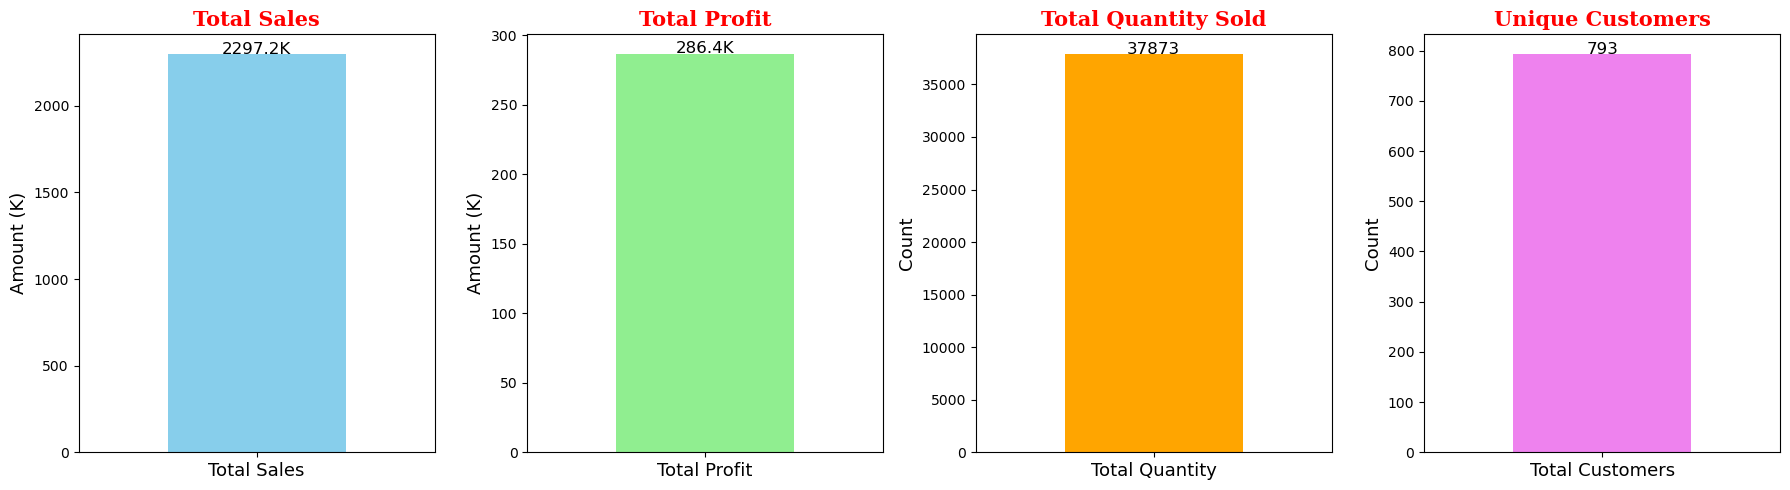

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

# KPI Calculations
total_sales_k = round(df['Sales'].sum() / 1000, 2)
total_profit_k = round(df['Profit'].sum() / 1000, 2)
total_quantity = df['Quantity'].sum()
total_customer = df['Customer ID'].nunique()  # use unique customers, not count of rows

# Plot Setup
plt.figure(figsize=(18, 5)) 

# Total Sales
plt.subplot(1, 4, 1)
pd.Series([total_sales_k], index=['Total Sales']).plot(kind='bar', color='skyblue')
plt.ylabel('Amount (K)', fontsize=13)
plt.title('Total Sales', fontsize=15, weight='bold', family='serif', color='red')
plt.xticks(rotation=0, fontsize=13)
plt.text(0, total_sales_k + 1, f'{total_sales_k}K', ha='center', fontsize=12)

# Total Profit
plt.subplot(1, 4, 2)
pd.Series([total_profit_k], index=['Total Profit']).plot(kind='bar', color='lightgreen')
plt.ylabel('Amount (K)', fontsize=13)
plt.title('Total Profit', fontsize=15, weight='bold', family='serif', color='red')
plt.xticks(rotation=0, fontsize=13)
plt.text(0, total_profit_k + 1, f'{total_profit_k}K', ha='center', fontsize=12)

# Total Quantity
plt.subplot(1, 4, 3)
pd.Series([total_quantity], index=['Total Quantity']).plot(kind='bar', color='orange')
plt.ylabel('Count', fontsize=13)
plt.title('Total Quantity Sold', fontsize=15, weight='bold', family='serif', color='red')
plt.xticks(rotation=0, fontsize=13)
plt.text(0, total_quantity + 1, f'{total_quantity}', ha='center', fontsize=12)

# Total Customers
plt.subplot(1, 4, 4)
pd.Series([total_customer], index=['Total Customers']).plot(kind='bar', color='violet')
plt.ylabel('Count', fontsize=13)
plt.title('Unique Customers', fontsize=15, weight='bold', family='serif', color='red')
plt.xticks(rotation=0, fontsize=13)
plt.text(0, total_customer + 1, f'{total_customer}', ha='center', fontsize=12)

# Layout
plt.tight_layout()
plt.show()


### 2.) Category vs Sales Vs Profit

In [233]:
sales_cat=df.groupby('Category')['Sales'].sum().reset_index()
profit_cat=df.groupby('Region')['Profit'].sum().reset_index()
print(sales_cat)
print()
print('-'*100)
print()
print(profit_cat)

          Category        Sales
0        Furniture  741999.7953
1  Office Supplies  719047.0320
2       Technology  836154.0330

----------------------------------------------------------------------------------------------------

    Region       Profit
0  Central   39706.3625
1     East   91522.7800
2    South   46749.4303
3     West  108418.4489


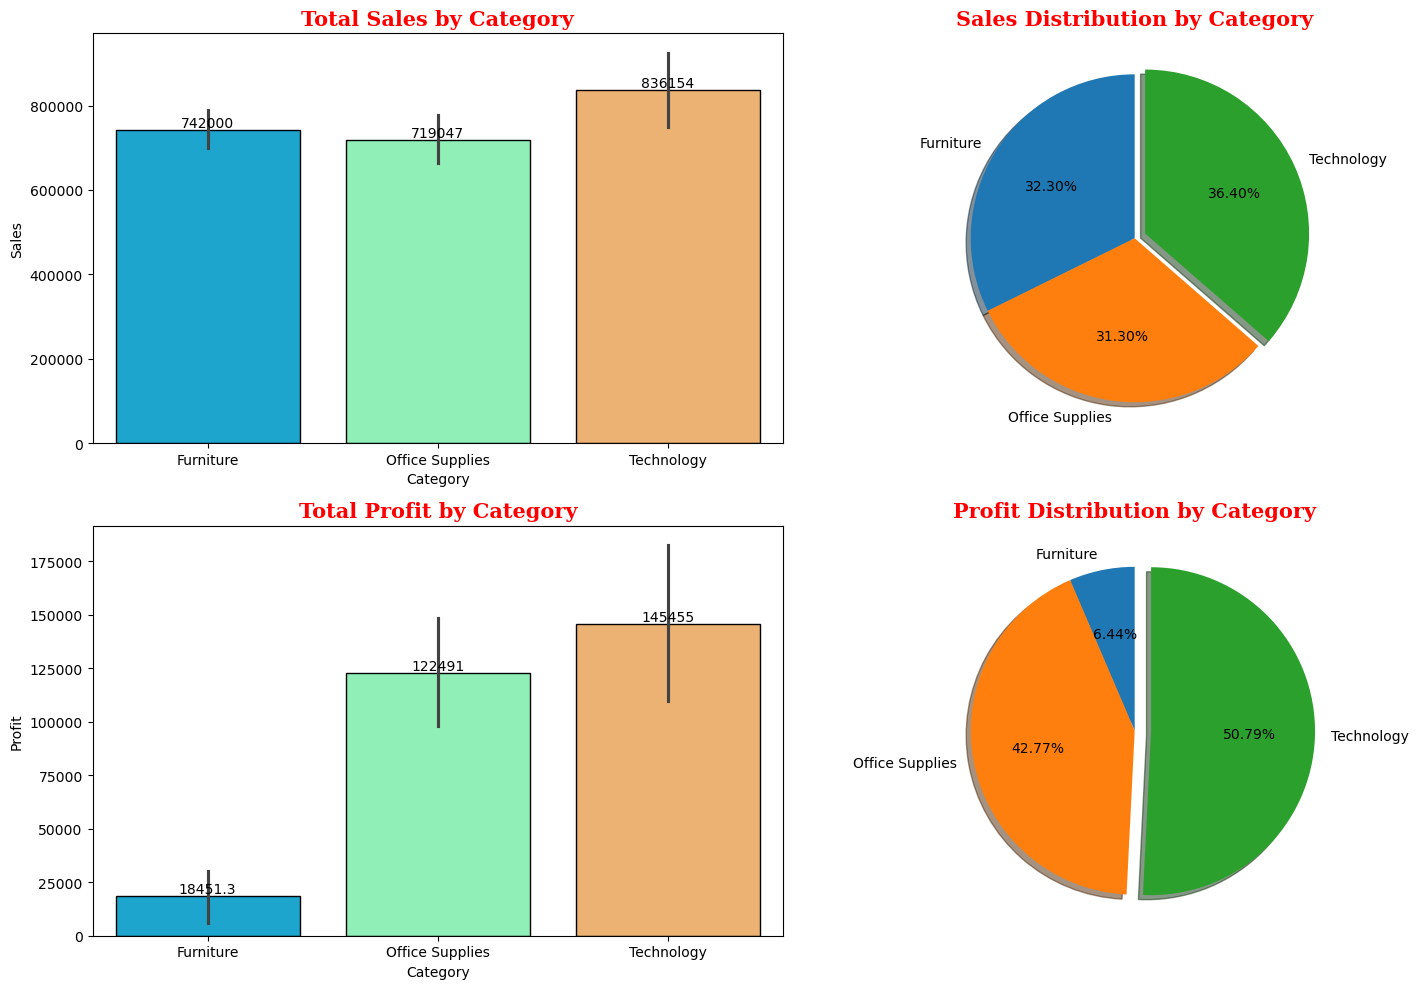

In [225]:
plt.figure(figsize=(15, 10))

# Barplot: Sales by Category
plt.subplot(2, 2, 1)
ax = sns.barplot(x='Category', y='Sales', data=df, estimator='sum', palette='rainbow',edgecolor='black')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]) 
ax.bar_label(ax.containers[2]) 
plt.title('Total Sales by Category', fontsize=15, weight='bold', family='serif', color='red')

# Pie chart: Sales by Category
plt.subplot(2, 2, 2)
df.groupby('Category')['Sales'].sum().plot(
    kind='pie',
    autopct='%0.2f%%',
    shadow=True,
    explode=[0, 0, 0.07],
    startangle=90)
plt.title('Sales Distribution by Category', fontsize=15, weight='bold', family='serif', color='red')
plt.ylabel('')

# Barplot: Profit by Category
plt.subplot(2, 2, 3)
ax = sns.barplot(x='Category', y='Profit', data=df, estimator='sum', palette='rainbow',edgecolor='black')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]) 
ax.bar_label(ax.containers[2]) 
plt.title('Total Profit by Category', fontsize=15, weight='bold', family='serif', color='red')

# Pie chart: Profit by Category
plt.subplot(2, 2, 4)
df.groupby('Category')['Profit'].sum().plot(
    kind='pie',
    autopct='%0.2f%%',
    shadow=True,
    explode=[0, 0,0.1],
    startangle=90)
plt.title('Profit Distribution by Category', fontsize=15, weight='bold', family='serif', color='red')
plt.ylabel('')

plt.tight_layout()
plt.show()

### 3.) Region vs sales & Profit

In [234]:
sales=df.groupby('Region')['Sales'].sum().reset_index()
profit=df.groupby('Region')['Profit'].sum().reset_index()
print(sales)
print()
print('-'*100)
print()
print(profit)

    Region        Sales
0  Central  501239.8908
1     East  678781.2400
2    South  391721.9050
3     West  725457.8245

----------------------------------------------------------------------------------------------------

    Region       Profit
0  Central   39706.3625
1     East   91522.7800
2    South   46749.4303
3     West  108418.4489


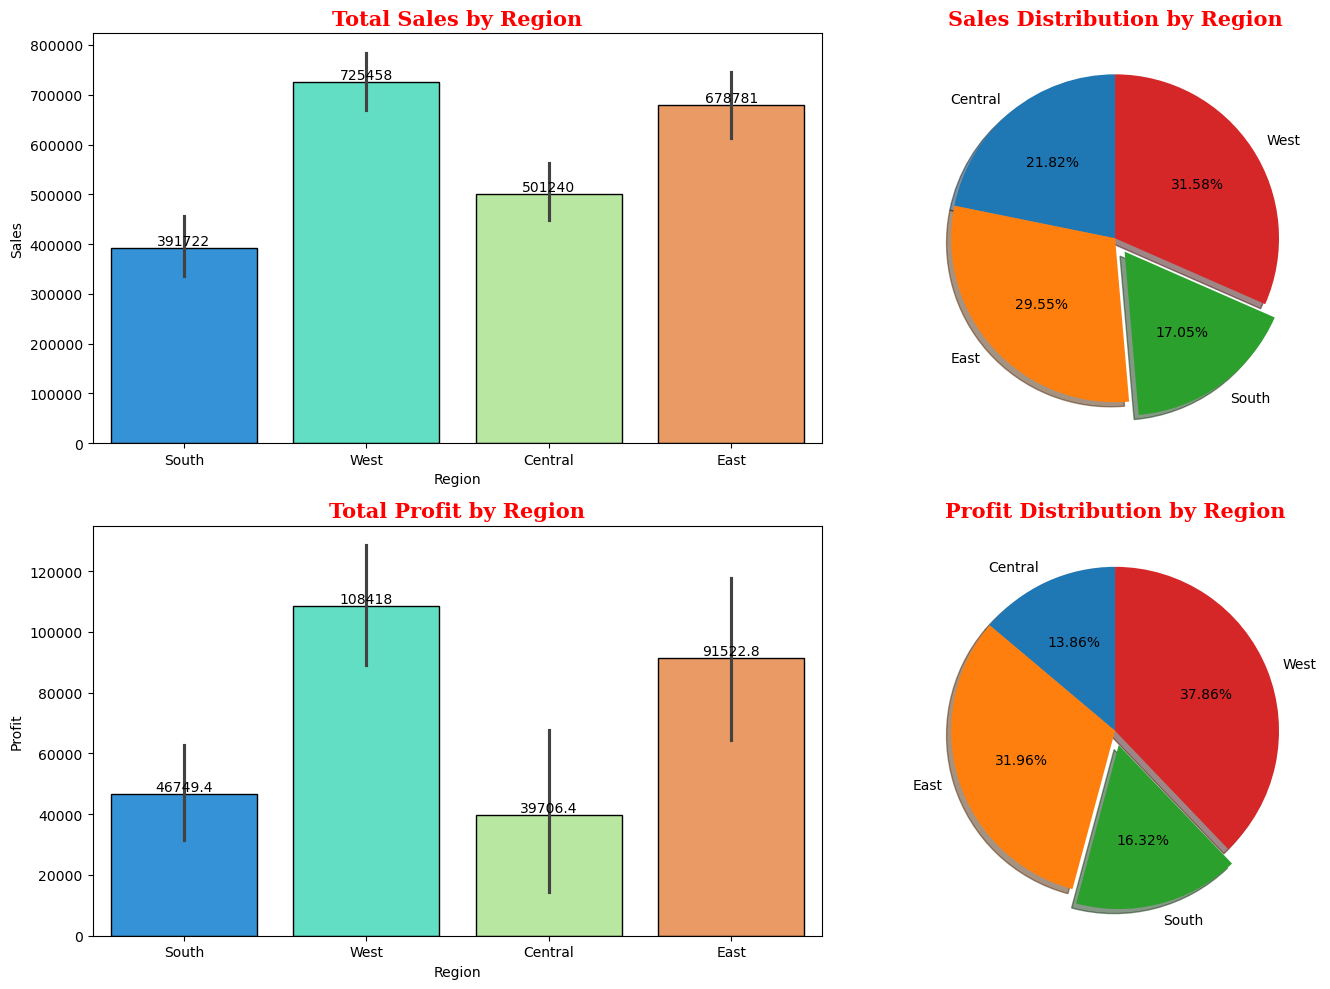

In [235]:
plt.figure(figsize=(15, 10))

# Barplot: Sales by Category
plt.subplot(2, 2, 1)
ax = sns.barplot(x='Region', y='Sales', data=df, estimator='sum', palette='rainbow',edgecolor='black')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]) 
ax.bar_label(ax.containers[2]) 
ax.bar_label(ax.containers[3]) 
plt.title('Total Sales by Region', fontsize=15, weight='bold', family='serif', color='red')

# Pie chart: Sales by Category
plt.subplot(2, 2, 2)
df.groupby('Region')['Sales'].sum().plot(
    kind='pie',
    autopct='%0.2f%%',
    shadow=True,
    explode=[0, 0, 0.1,0],
    startangle=90)
plt.title('Sales Distribution by Region', fontsize=15, weight='bold', family='serif', color='red')
plt.ylabel('')

# Barplot: Profit by Category
plt.subplot(2, 2, 3)
ax = sns.barplot(x='Region', y='Profit', data=df, estimator='sum', palette='rainbow',edgecolor='black')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]) 
ax.bar_label(ax.containers[2]) 
ax.bar_label(ax.containers[3]) 
plt.title('Total Profit by Region', fontsize=15, weight='bold', family='serif', color='red')

# Pie chart: Profit by Category
plt.subplot(2, 2, 4)
df.groupby('Region')['Profit'].sum().plot(
    kind='pie',
    autopct='%0.2f%%',
    shadow=True,
    explode=[0, 0, 0.09,0],
    startangle=90)
plt.title('Profit Distribution by Region', fontsize=15, weight='bold', family='serif', color='red')
plt.ylabel('')

plt.tight_layout()
plt.show()

### 4.) Sales Vs Date

In [271]:
round(year_data)

,Sales,Profit
Order_Date_year,,
2014,484247.0,49544.0
2015,470533.0,61619.0
2016,609206.0,81795.0
2017,733215.0,93439.0


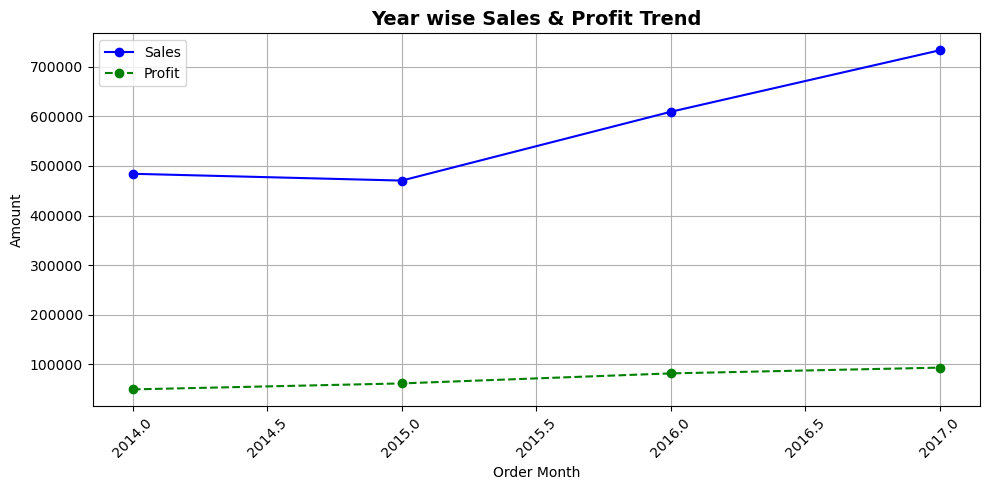

In [302]:
year_data = df.groupby('Order_Date_year')[['Sales', 'Profit']].sum()

plt.figure(figsize=(10, 5))

# Plot Sales line
plt.plot(year_data.index, monthly_data['Sales'], label='Sales', marker='o', linestyle='-', color='blue')

# Plot Profit line
plt.plot(year_data.index, monthly_data['Profit'], label='Profit', marker='o', linestyle='--', color='green')

plt.title('Year wise Sales & Profit Trend', fontsize=14, weight='bold')
plt.xlabel('Order Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 5.) Sales vs Segment

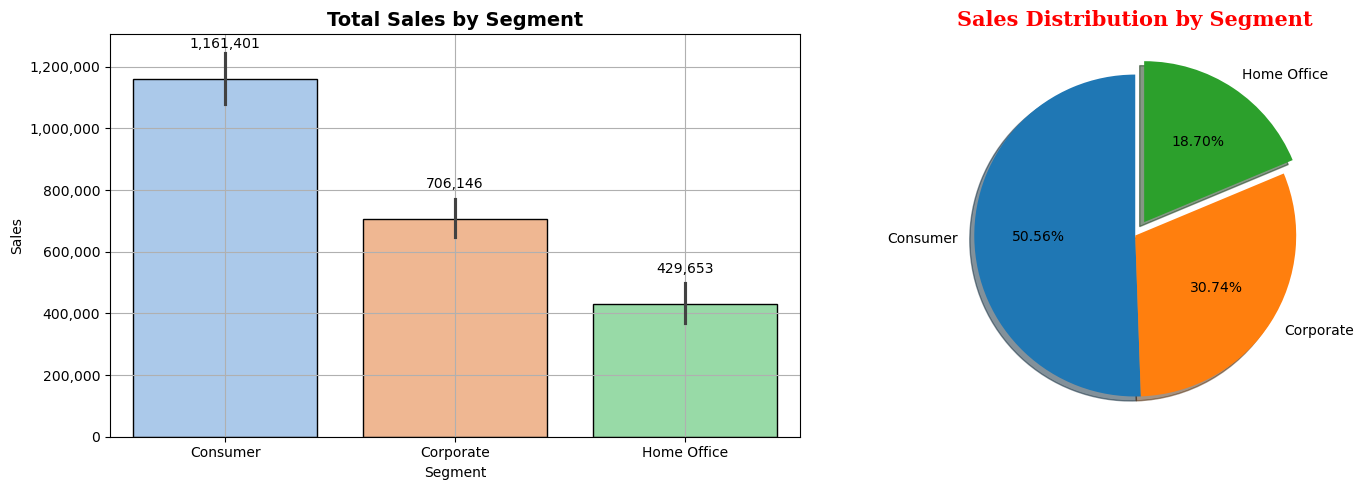

In [300]:
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(15, 5))
# Subplot 1: Barplot
plt.subplot(1, 2, 1)
ax = sns.barplot(x='Segment', y='Sales', data=df, estimator='sum', palette='pastel', edgecolor='black')

for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{int(bar.get_height()):,}' for bar in container],
        label_type='edge',        
        padding=20,  
        fontsize=10
    )

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Total Sales by Segment', fontsize=14, weight='bold')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.grid(True)

# Subplot 2: Pie Chart
plt.subplot(1, 2, 2)
df.groupby('Segment')['Sales'].sum().plot(
    kind='pie',
    autopct='%0.2f%%',
    shadow=True,
    explode=[0, 0, 0.1],
    startangle=90)
plt.title('Sales Distribution by Segment', fontsize=15, weight='bold', family='serif', color='red')
plt.ylabel('')

plt.tight_layout()
plt.show()

### 6.) Which Sub_categories have been highest no. of Order

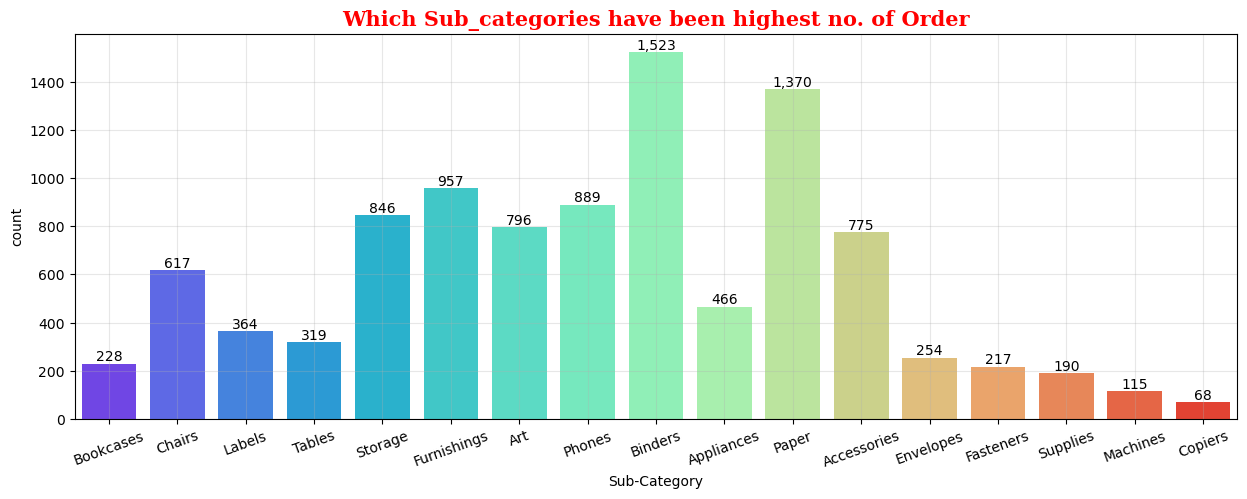

In [321]:
plt.figure(figsize=(15, 5))
ax=sns.countplot(x='Sub-Category',data=df,palette='rainbow')
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{int(bar.get_height()):,}' for bar in container],
        label_type='edge',        
        padding=0,  
        fontsize=10
    )
plt.title('Which Sub_categories have been highest no. of Order', fontsize=15, weight='bold', family='serif', color='red')
plt.xticks(rotation=20)
plt.grid(True,alpha=0.3)
plt.show()

### 7.) Sub_category vs Sales vs profit

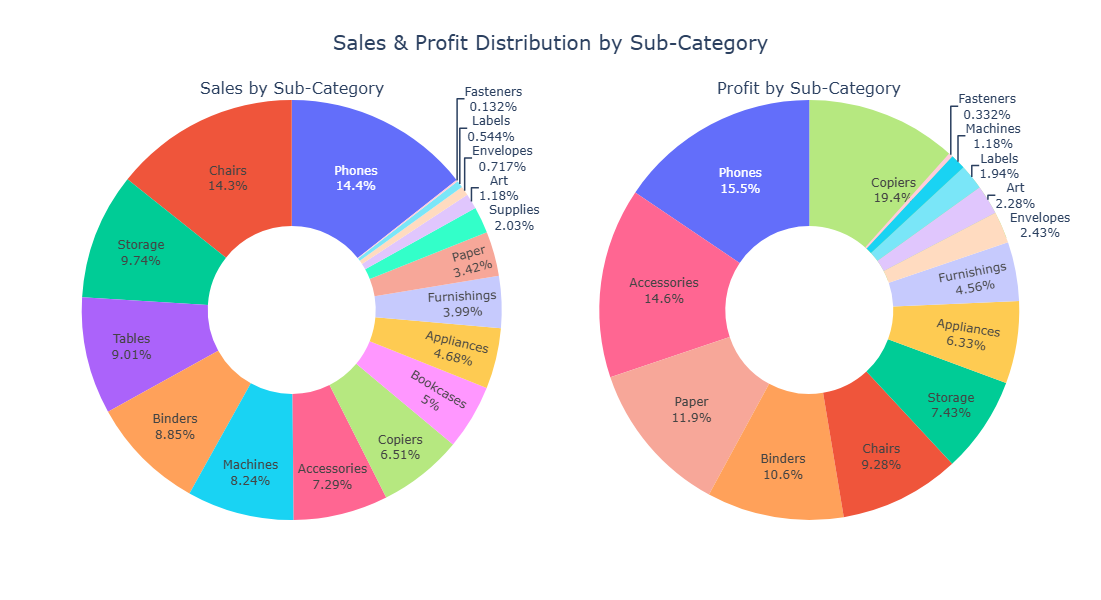

In [343]:
sub_data = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index()
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=['Sales by Sub-Category', 'Profit by Sub-Category'])

fig.add_trace(go.Pie(
    labels=sub_data['Sub-Category'],
    values=sub_data['Sales'],
    name='Sales',
    hole=0.4,  # Optional: makes it a donut chart
    textinfo='percent+label'
), row=1, col=1)

fig.add_trace(go.Pie(
    labels=sub_data['Sub-Category'],
    values=sub_data['Profit'],
    name='Profit',
    hole=0.4,
    textinfo='percent+label'
), row=1, col=2)

fig.update_layout(
    title_text='Sales & Profit Distribution by Sub-Category',
    title_font_size=20,
    title_x=0.5,
    showlegend=False,
    height=600)

fig.show()

### 8.) Relation between Sales & profit

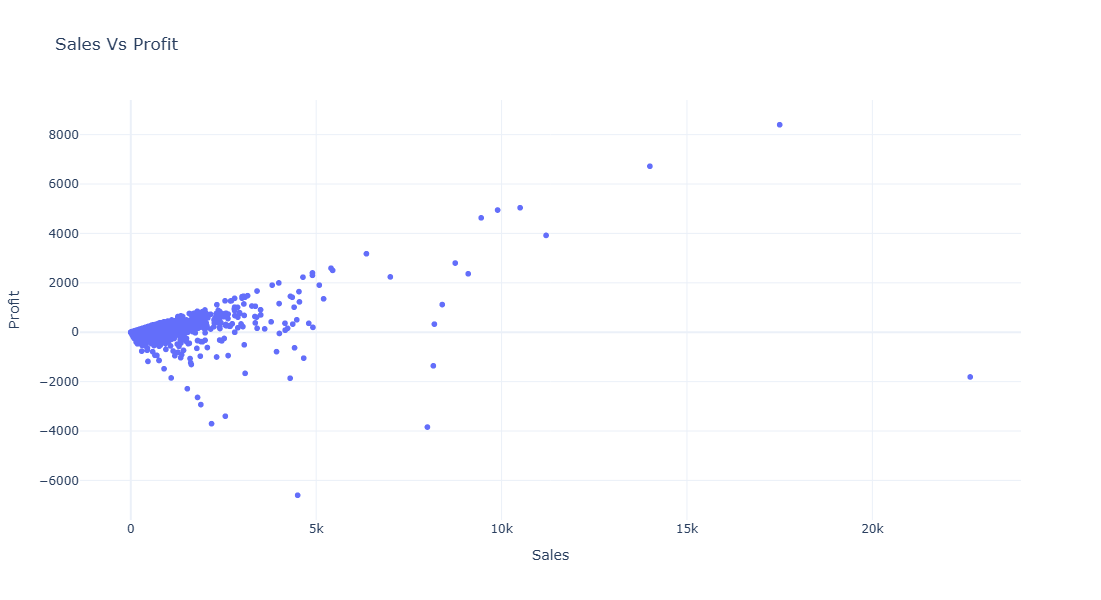

In [352]:
fig = px.scatter(df, 
                 x='Sales', 
                 y='Profit',
                 title='Sales Vs Profit')
                
fig.update_layout(
    xaxis_title='Sales',
    yaxis_title='Profit',
    xaxis_tickangle=0,
    width=1100,  
    height=600 )  
fig.show()

### 9.) Find a relation among sales Vs region Vs year vs Profit

In [361]:
table_sales = df.pivot_table(
    values='Sales',
    index='Region',
    columns='Order_Date_year',
    aggfunc='sum')
table_revenue

Order_Date_year,2014,2015,2016,2017
Region,,,,
Central,103838.1646,102874.2220,147429.3760,147098.1282
East,128680.4570,156332.0570,180685.8220,213082.9040
South,103845.8435,71359.9805,93610.2235,122905.8575
West,147883.0330,139966.2495,187480.1765,250128.3655


In [362]:
table_profit = df.pivot_table(
    values='Profit',
    index='Region',
    columns='Order_Date_year',
    aggfunc='sum')
table_revenue

Order_Date_year,2014,2015,2016,2017
Region,,,,
Central,103838.1646,102874.2220,147429.3760,147098.1282
East,128680.4570,156332.0570,180685.8220,213082.9040
South,103845.8435,71359.9805,93610.2235,122905.8575
West,147883.0330,139966.2495,187480.1765,250128.3655


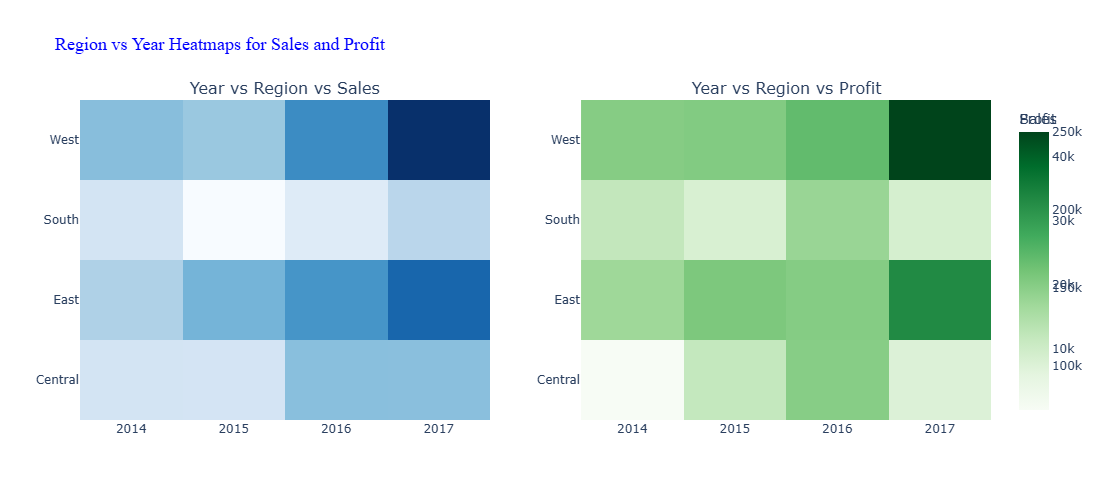

In [372]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Year vs Region vs Sales", "Year vs Region vs Profit"))

fig.add_trace(
    go.Heatmap(
        z=table_sales.values,
        x=table_sales.columns,
        y=table_sales.index,
        colorscale='Blues',
        colorbar=dict(title='Sales'),
        hovertemplate='Year: %{x}<br>Region: %{y}<br>Sales: %{z:.2f}<extra></extra>'
    ),
    row=1, col=1)
fig.add_trace(
    go.Heatmap(
        z=table_profit.values,
        x=table_profit.columns,
        y=table_profit.index,
        colorscale='Greens',
        colorbar=dict(title='Profit'),
        hovertemplate='Year: %{x}<br>Region: %{y}<br>Profit: %{z:.2f}<extra></extra>'
    ),
    row=1, col=2)

fig.update_layout(
    title='Region vs Year Heatmaps for Sales and Profit',
    title_font=dict(size=18, family='serif', color='blue'),
    height=500,
    width=1000,
    showlegend=False)

fig.show()

### 11.) Order Count by category vs Ship Mode

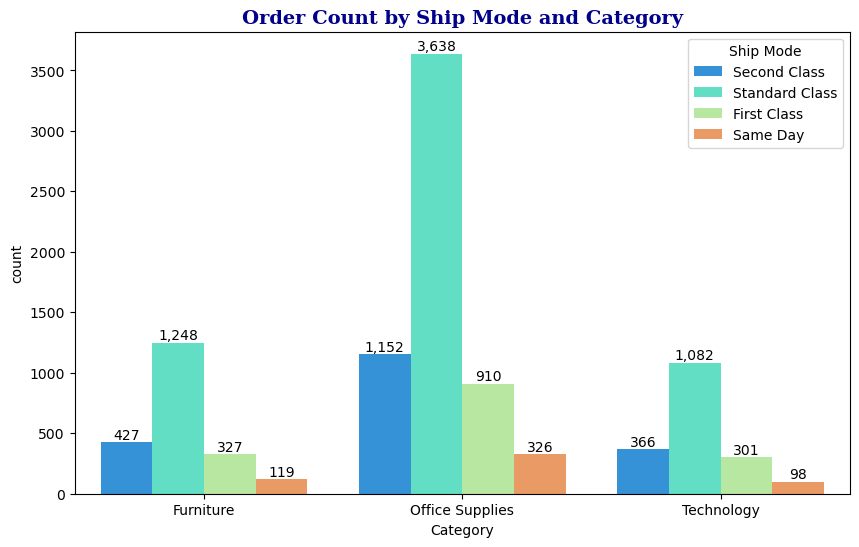

In [381]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Category',data=df,hue='Ship Mode',palette='rainbow')
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{int(bar.get_height()):,}' for bar in container],
        label_type='edge',        
        padding=0,  
        fontsize=10
    )
plt.title('Order Count by Ship Mode and Category', fontsize=14, weight='bold', family='serif', color='darkblue')
plt.show()

### 12.) Top 5 & Bottow 5 state vs Sales

In [411]:
top_state = df.groupby('State')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False).head()
bottow_state= df.groupby('State')['Sales'].sum().sort_values(ascending=True).head()
print(top_state)
print(bottow_state)

           State        Sales
3     California  457687.6315
30      New York  310876.2710
41         Texas  170188.0458
45    Washington  138641.2700
36  Pennsylvania  116511.9140
State
North Dakota      919.910
West Virginia    1209.824
Maine            1270.530
South Dakota     1315.560
Wyoming          1603.136
Name: Sales, dtype: float64


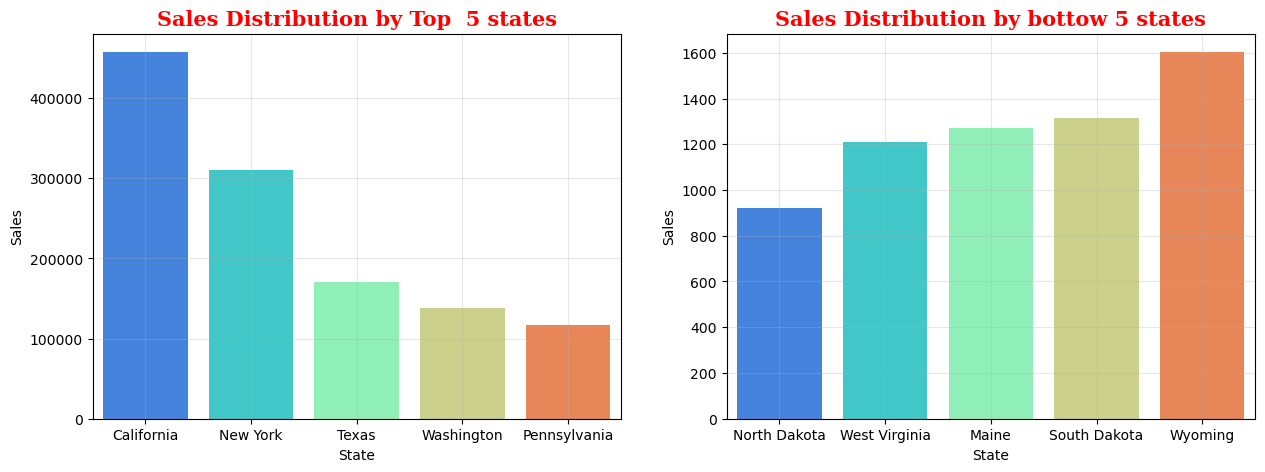

In [427]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(y='Sales',x='State',data=top_state,palette='rainbow')
plt.title('Sales Distribution by Top  5 states', fontsize=15, weight='bold', family='serif', color='red')
plt.grid(True,alpha=0.3)


plt.subplot(1,2,2)
sns.barplot(y='Sales',x='State',data=bottom_state,palette='rainbow')
plt.title('Sales Distribution by bottow 5 states', fontsize=15, weight='bold', family='serif', color='red')

plt.grid(True,alpha=0.3)
plt.show()

##

### 13.) High sales top 5 states & top region

In [432]:
top_state = df.groupby(['State','Region'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False).head()
top_state

,State,Region,Sales
3,California,West,457687.6315
30,New York,East,310876.2710
41,Texas,Central,170188.0458
45,Washington,West,138641.2700
36,Pennsylvania,East,116511.9140


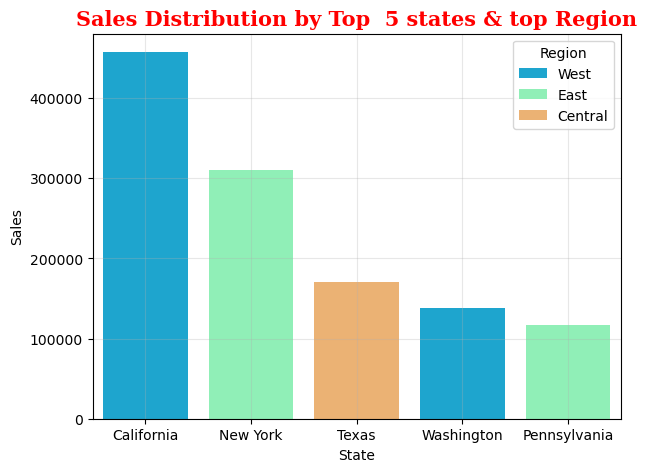

In [434]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(y='Sales',x='State',data=top_state,palette='rainbow',hue='Region')
plt.title('Sales Distribution by Top  5 states & top Region', fontsize=15, weight='bold', family='serif', color='red')
plt.grid(True,alpha=0.3)